# Importing Libraries

In [3]:
import numpy as np 
import pandas as pd 
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical 
import librosa
import librosa.display
import glob 
import skimage
from tqdm import tqdm
import IPython.display as ipd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/urbansound8k/UrbanSound8K.csv
/kaggle/input/urbansound8k/fold7/164797-2-0-8.wav
/kaggle/input/urbansound8k/fold7/177537-7-2-0.wav
/kaggle/input/urbansound8k/fold7/177729-0-0-68.wav
/kaggle/input/urbansound8k/fold7/6902-2-0-18.wav
/kaggle/input/urbansound8k/fold7/518-4-0-2.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-2.wav
/kaggle/input/urbansound8k/fold7/116485-3-2-4.wav
/kaggle/input/urbansound8k/fold7/518-4-0-3.wav
/kaggle/input/urbansound8k/fold7/44737-5-0-2.wav
/kaggle/input/urbansound8k/fold7/201988-5-0-3.wav
/kaggle/input/urbansound8k/fold7/181102-9-0-50.wav
/kaggle/input/urbansound8k/fold7/99812-1-6-0.wav
/kaggle/input/urbansound8k/fold7/39857-5-0-0.wav
/kaggle/input/urbansound8k/fold7/61503-2-0-6.wav
/kaggle/input/urbansound8k/fold7/162728-1-0-0.wav
/kaggle/input/urbansound8k/fold7/89443-9-0-48.wav
/kaggle/input/urbansound8k/fold7/168846-5-1-13.wav
/kaggle/input/urbansound8k/fold7/149193-5-0-2.wav
/kaggle/input/urbansound8k/fold7/71529-4-0-2.wav
/kaggle/input/u

# EDA

In [4]:
df=pd.read_csv("../input/urbansound8k/UrbanSound8K.csv")

In [5]:
df.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [6]:
df.tail()

,slice_file_name,fsID,start,end,salience,fold,classID,class
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn
8731,99812-1-6-0.wav,99812,332.289233,334.821332,2,7,1,car_horn


In [7]:
df.sample(8)

,slice_file_name,fsID,start,end,salience,fold,classID,class
144,102857-5-0-29.wav,102857,14.500000,18.500000,1,10,5,engine_idling
703,113202-5-0-21.wav,113202,10.500000,14.500000,1,8,5,engine_idling
2028,148632-8-0-15.wav,148632,137.295722,141.295722,2,8,8,siren
7846,74850-9-0-22.wav,74850,11.000000,15.000000,2,7,9,street_music
4662,188813-7-11-0.wav,188813,50.529888,54.529888,1,10,7,jackhammer
6805,55018-0-0-110.wav,55018,59.041583,63.041583,1,4,0,air_conditioner
8394,90014-8-0-4.wav,90014,2.000000,6.000000,1,3,8,siren
761,113785-3-1-0.wav,113785,0.991278,1.592177,1,2,3,dog_bark


In [8]:
df.loc[4800:4805]

,slice_file_name,fsID,start,end,salience,fold,classID,class
4800,189991-0-0-5.wav,189991,2.500000,6.500000,1,2,0,air_conditioner
4801,189991-0-0-6.wav,189991,3.000000,7.000000,1,2,0,air_conditioner
4802,189991-0-0-7.wav,189991,3.500000,7.500000,1,2,0,air_conditioner
4803,19007-4-0-0.wav,19007,0.000000,4.000000,2,5,4,drilling
4804,19026-1-0-0.wav,19026,0.012822,1.050575,1,1,1,car_horn
4805,190680-3-1-0.wav,190680,5.960838,7.497520,2,6,3,dog_bark


In [9]:
df["class"].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [10]:
df["class"].nunique()

10

In [11]:
df.describe()

,fsID,start,end,salience,fold,classID
count,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000
mean,116033.493816,38.645409,42.253312,1.347000,5.385937,4.592877
std,57991.017218,74.292126,74.369669,0.476043,2.846820,2.894544
min,344.000000,0.000000,0.105962,1.000000,1.000000,0.000000
25%,69942.250000,3.000000,6.839398,1.000000,3.000000,2.000000
50%,118279.000000,10.376492,14.000000,1.000000,5.000000,4.000000
75%,166942.000000,35.131372,38.866979,2.000000,8.000000,7.000000
max,209992.000000,600.125356,604.125356,2.000000,10.000000,9.000000


In [12]:
df["salience"].value_counts()

1    5702
2    3030
Name: salience, dtype: int64

# DATA VISULATION

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


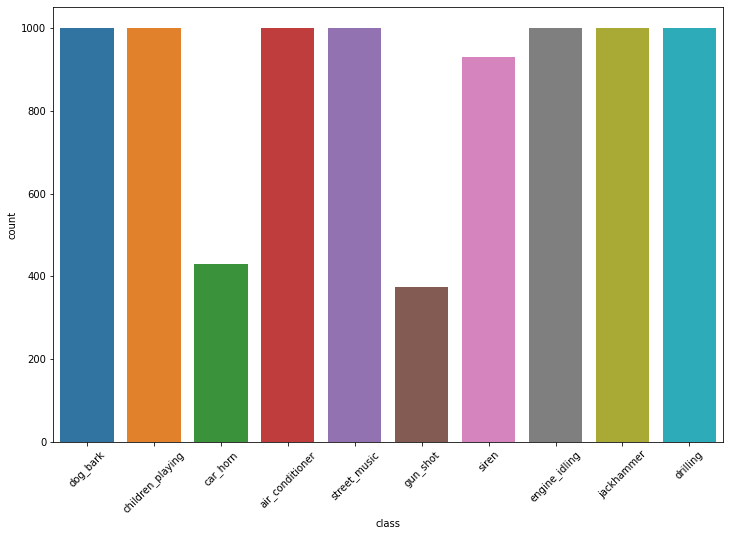

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(df["class"]);
plt.xticks(rotation=45);
plt.show()

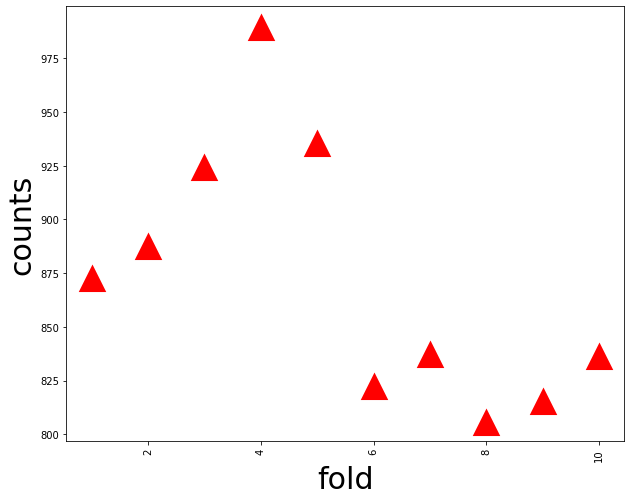

In [14]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df["fold"].value_counts(),marker="^",color="red",s=1000)
plt.ylabel("counts",fontsize=30)
plt.xlabel("fold",fontsize=30)
plt.xticks(rotation=90)
plt.show()

# PREPROCESSING

In [15]:
def create_spectogram(y,sr):
    spec=librosa.feature.melspectrogram(y=y,sr=sr)
    spec_conv=librosa.amplitude_to_db(spec,ref=np.max)
    return spec_conv

We cant read this files : **4803 6246 6247 6248  6249 6250 6251 6252 8038 8338**

In [16]:
from pydub import AudioSegment
# 4803 6246 6247 6248  6249 6250 6251 6252 8038 8338 

i = 4803  # Add here the fix length you want (in milliseconds)
path="../input/urbansound8k/fold"+str(df.fold[i])+ '/' +str(df["slice_file_name"][i])
ipd.Audio(path)

In [17]:
import soundfile as sf
i = 4803  # Add here the fix length you want (in milliseconds)
path="../input/urbansound8k/fold"+str(df.fold[i])+ '/' +str(df["slice_file_name"][i])
f = sf.SoundFile(path)
f

SoundFile('../input/urbansound8k/fold5/19007-4-0-0.wav', mode='r', samplerate=22050, channels=1, format='WAV', subtype='IMA_ADPCM', endian='FILE')

In [18]:
import soundfile as sf
i = 4804  # Add here the fix length you want (in milliseconds)
path="../input/urbansound8k/fold"+str(df.fold[i])+ '/' +str(df["slice_file_name"][i])
f = sf.SoundFile(path)
f

SoundFile('../input/urbansound8k/fold1/19026-1-0-0.wav', mode='r', samplerate=44100, channels=1, format='WAV', subtype='PCM_16', endian='FILE')

In [20]:
from pydub import AudioSegment
# 4803 6246 6247 6248  6249 6250 6251 6252 8038 8338 

i = 8338  # Add here the fix length you want (in milliseconds)
path="../input/urbansound8k/fold"+str(df.fold[i])+ '/' +str(df["slice_file_name"][i])
ipd.Audio(path)

As you can see subtype is diffrent: ***PCM_16*** and ***IMA_ADPCM***

In [19]:
from pydub import AudioSegment
# 4803 6246 6247 6248  6249 6250 6251 6252 8038 8338 

i = 6246  # Add here the fix length you want (in milliseconds)
path="../input/urbansound8k/fold"+str(df.fold[i])+ '/' +str(df["slice_file_name"][i])
ipd.Audio(path)

In [21]:
df.drop([6247 ,6248 ,6246, 6249, 6250 ,6251, 6252, 8038, 8338, 4803],axis=0,inplace=True)

I deleted this files
and reseted indexs .

In [22]:
df.reset_index(drop=True,inplace=True)

## Spectogram visulation

(88200,)
(88200,)
------------------------------------------------
22050


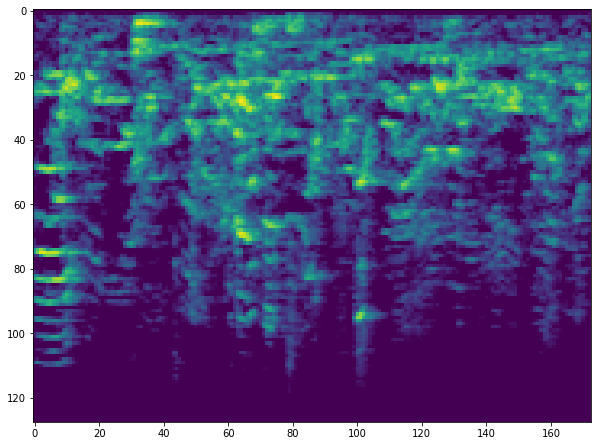

In [23]:
i = 1500 
fname="../input/urbansound8k/fold"+str(df.fold[i])+ '/' +str(df["slice_file_name"][i])
sample,sr=librosa.load(fname,res_type='kaiser_fast')
print(sample.shape)
sample_spec=create_spectogram(sample,sr)
print(sample.shape)
print("------------------------------------------------")
print(sr)
plt.figure(figsize=(10,10))
plt.imshow(sample_spec)
plt.show()

(88200,)
(88200,)
------------------------------------------------
22050


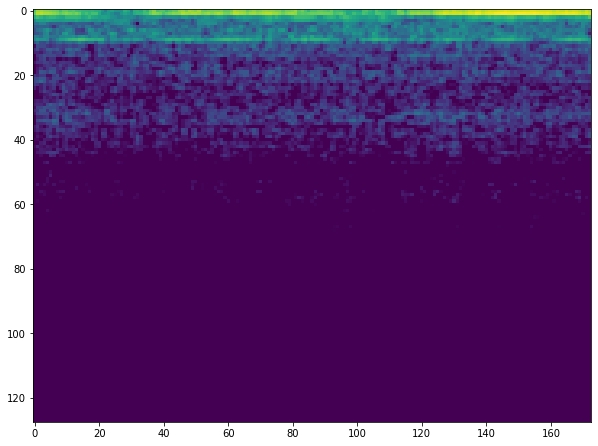

In [24]:
i = 2000 
fname="../input/urbansound8k/fold"+str(df.fold[i])+ '/' +str(df["slice_file_name"][i])
sample,sr=librosa.load(fname,res_type='kaiser_fast')
print(sample.shape)
sample_spec=create_spectogram(sample,sr)
print(sample.shape)
print("------------------------------------------------")
print(sr)
plt.figure(figsize=(10,10))
plt.imshow(sample_spec)
plt.show()

(88200,)
(88200,)
------------------------------------------------
22050


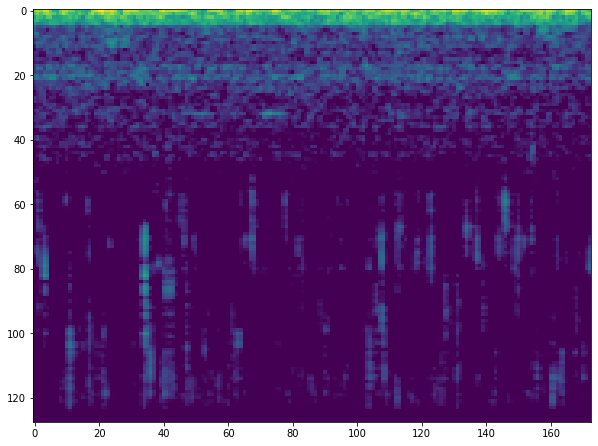

In [25]:
i = 1900 
fname="../input/urbansound8k/fold"+str(df.fold[i])+ '/' +str(df["slice_file_name"][i])
sample,sr=librosa.load(fname,res_type='kaiser_fast')
print(sample.shape)
sample_spec=create_spectogram(sample,sr)
print(sample.shape)
print("------------------------------------------------")
print(sr)
plt.figure(figsize=(10,10))
plt.imshow(sample_spec)
plt.show()

In [ ]:
feature=[]
label=[]

for i in range(0,df.shape[0]):
    pad_ms = 4010  # Add here the fix length you want (in milliseconds)
    path="../input/urbansound8k/fold"+str(df.fold[i])+ '/' +str(df["slice_file_name"][i])
    if i%100==0:
        print(i)
    audio = AudioSegment.from_wav(path)
    assert pad_ms > len(audio), "Audio was longer that 1 second. Path: " + str(path)
    silence = AudioSegment.silent(duration=pad_ms-len(audio)+1)


    padded = audio + silence  # Adding silence after the audio
    padded.export('{}.wav'.format(i), format='wav')
    path="./{}.wav".format(i)
    sample,sr=librosa.load(path,res_type='kaiser_fast')
    mels = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)        
    feature.append(mels)
    label.append(df["classID"][i])

**I added silence to voice for being the same second for having the same shape**

#### **Then I taked mean of frequences of voice on there**

In [28]:
feature1=[]
label1=[]

for i in range(0,df.shape[0]):
    pad_ms = 4010  # Add here the fix length you want (in milliseconds)
    path="../input/urbansound8k/fold"+str(df.fold[i])+ '/' +str(df["slice_file_name"][i])
    if i%100==0:
        print(i)
    audio = AudioSegment.from_wav(path)
    assert pad_ms > len(audio), "Audio was longer that 1 second. Path: " + str(path)
    silence = AudioSegment.silent(duration=pad_ms-len(audio)+1)


    padded = audio + silence  # Adding silence after the audio
    padded.export('{}.wav'.format(i), format='wav')
    path="./{}.wav".format(i)
    sample,sr=librosa.load(path,res_type='kaiser_fast')
    mels = librosa.feature.melspectrogram(y=sample, sr=sr)
    feature1.append(mels)
    label1.append(df["classID"][i])

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700


### I didnt take mean of frequences on there

In [29]:
from numpy import save
save("feature.npy",feature)
save("label.npy",label)

save("feature1.npy",feature1)
save("label1.npy",label1)

# load numpy array from npy file
from numpy import load
feature_ = load('feature.npy')
label_=load("label.npy")
feature_1 = load('feature1.npy')
label_1=load("label1.npy")
# print the array
print(feature_1.shape)
print(label_1.shape)

(8722, 128, 173)
(8722,)
